In [1]:
import pandas as pd
df=pd.read_csv("airtell_tweet_replies.csv")

In [3]:
df

,Unnamed: 0,type,id,url,twitterUrl,text,source,retweetCount,replyCount,likeCount,...,conversationId,inReplyToUserId,inReplyToUsername,author,extendedEntities,card,place,entities,quoted_tweet,retweeted_tweet
0,0,tweet,1885466590558195998,https://x.com/AirtelNigeria/status/18854665905...,https://twitter.com/AirtelNigeria/status/18854...,"@EruotorSuccess Hello @EruotorSuccess, apologi...",Twitter for iPhone,0,2,0,...,1885323449968566295,1.267273e+18,Mayorofagbarho,"{'type': 'user', 'userName': 'AirtelNigeria', ...",{},NaN,{},{},NaN,NaN
1,1,tweet,1885465559246029116,https://x.com/Mayorofagbarho/status/1885465559...,https://twitter.com/Mayorofagbarho/status/1885...,@AirtelNigeria Guy airtel too useless and don'...,Twitter for iPhone,0,2,12,...,1885323449968566295,3.420808e+08,AirtelNigeria,"{'type': 'user', 'userName': 'Mayorofagbarho',...",{},NaN,{},"{'user_mentions': [{'id_str': '342080796', 'in...",NaN,NaN
2,2,tweet,1885456537868443729,https://x.com/AirtelNigeria/status/18854565378...,https://twitter.com/AirtelNigeria/status/18854...,"@_AdakoleFrancis Hello, we empathize, kindly n...",Twitter for iPhone,0,0,0,...,1885323449968566295,1.317514e+18,_AdakoleFrancis,"{'type': 'user', 'userName': 'AirtelNigeria', ...",{},NaN,{},{'user_mentions': [{'id_str': '131751418907063...,NaN,NaN
3,3,tweet,1885455197666697438,https://x.com/AirtelNigeria/status/18854551976...,https://twitter.com/AirtelNigeria/status/18854...,"@scoper_m Hello, kindly note that you have bee...",Twitter for iPhone,0,0,0,...,1885323449968566295,1.108155e+18,YuIdanmanny,"{'type': 'user', 'userName': 'AirtelNigeria', ...",{},NaN,{},{},NaN,NaN
4,4,tweet,1885453423711052070,https://x.com/_AdakoleFrancis/status/188545342...,https://twitter.com/_AdakoleFrancis/status/188...,@AirtelNigeria I bought data it hasn't reflected,Twitter for iPhone,0,1,0,...,1885323449968566295,3.420808e+08,AirtelNigeria,"{'type': 'user', 'userName': '_AdakoleFrancis'...",{},NaN,{},"{'user_mentions': [{'id_str': '342080796', 'in...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2704,tweet,1874452421373841827,https://x.com/ttds1k/status/1874452421373841827,https://twitter.com/ttds1k/status/187445242137...,@AirtelNigeria @SympLySimi Hello i subscribed ...,Twitter for iPhone,0,1,0,...,1874424801051472017,3.420808e+08,AirtelNigeria,"{'type': 'user', 'userName': 'ttds1k', 'url': ...",{},NaN,{},"{'user_mentions': [{'id_str': '342080796', 'in...",NaN,NaN
2934,2705,tweet,1874451732631327136,https://x.com/ttds1k/status/1874451732631327136,https://twitter.com/ttds1k/status/187445173263...,@AirtelNigeria @SympLySimi Hello i subscribed ...,Twitter for iPhone,0,0,0,...,1874424801051472017,3.420808e+08,AirtelNigeria,"{'type': 'user', 'userName': 'ttds1k', 'url': ...",{},NaN,{},"{'user_mentions': [{'id_str': '342080796', 'in...",NaN,NaN
2935,2706,tweet,1874426978293444827,https://x.com/AirtelNigeria/status/18744269782...,https://twitter.com/AirtelNigeria/status/18744...,@Positive004 Kindly dial the USSD code *370# o...,Twitter for iPhone,0,1,0,...,1874424801051472017,1.353935e+09,Positive004,"{'type': 'user', 'userName': 'AirtelNigeria', ...",{},"{'binding_values': [{'key': 'thumbnail_image',...",{},"{'urls': [{'display_url': 'airtel.com.ng/HBB',...",NaN,NaN
2936,2707,tweet,1874426920760131982,https://x.com/AirtelNigeria/status/18744269207...,https://twitter.com/AirtelNigeria/status/18744...,"@Positive004 @SympLySimi Hello@Positive004, we...",Twitter for iPhone,0,0,0,...,1874424801051472017,1.353935e+09,Positive004,"{'type': 'user', 'userName': 'AirtelNigeria', ...",{},NaN,{},"{'user_mentions': [{'id_str': '1353935156', 'i...",NaN,NaN


In [4]:
import pandas as pd

# Load your Facebook dataset (update with your actual file path)

# Ensure text columns are strings and handle NaN values
df.fillna("", inplace=True)

# Define search terms
search_terms = [ "airtel app","app","application","airtel application","APP","App","Application","AIRTEL application", "Airtel app", "AIrtel app ng", "airtel nigeria app"]

# Filter posts that mention "MyMTN" or "MyMTN app"

# Filter comments that mention "MyMTN" or "MyMTN app"
comments_with_mymtn = df[df["text"].str.contains("|".join(search_terms), case=False, na=False)]

# Save results
comments_with_mymtn.to_csv("filtered_comments_airtel.csv", index=False)

# Display summary
print(f" posts and {len(comments_with_mymtn)} comments mentioning 'MyMTN' or 'MyMTN app'.")


C:\Users\LCT\AppData\Local\Temp\ipykernel_18936\4276674410.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna("", inplace=True)


 posts and 141 comments mentioning 'MyMTN' or 'MyMTN app'.


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LCT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Identified Topics:
Topic 1: experience, empathize, assistance, number, https, check, kindly, dm, hello, thank
Topic 2: resolve, airtel, matter, hello, note, customer, offer, experience, airtelnigeria, network
Topic 3: money, send, guy, network, una, airtel, datum, diamondplatnumz, symplysimi, airtelnigeria
Topic 4: dm, datum, https, thank, assistance, number, kindly, hello, issue, experience
Topic 5: use, internet, day, router, work, diamondplatnumz, airtel, symplysimi, network, airtelnigeria


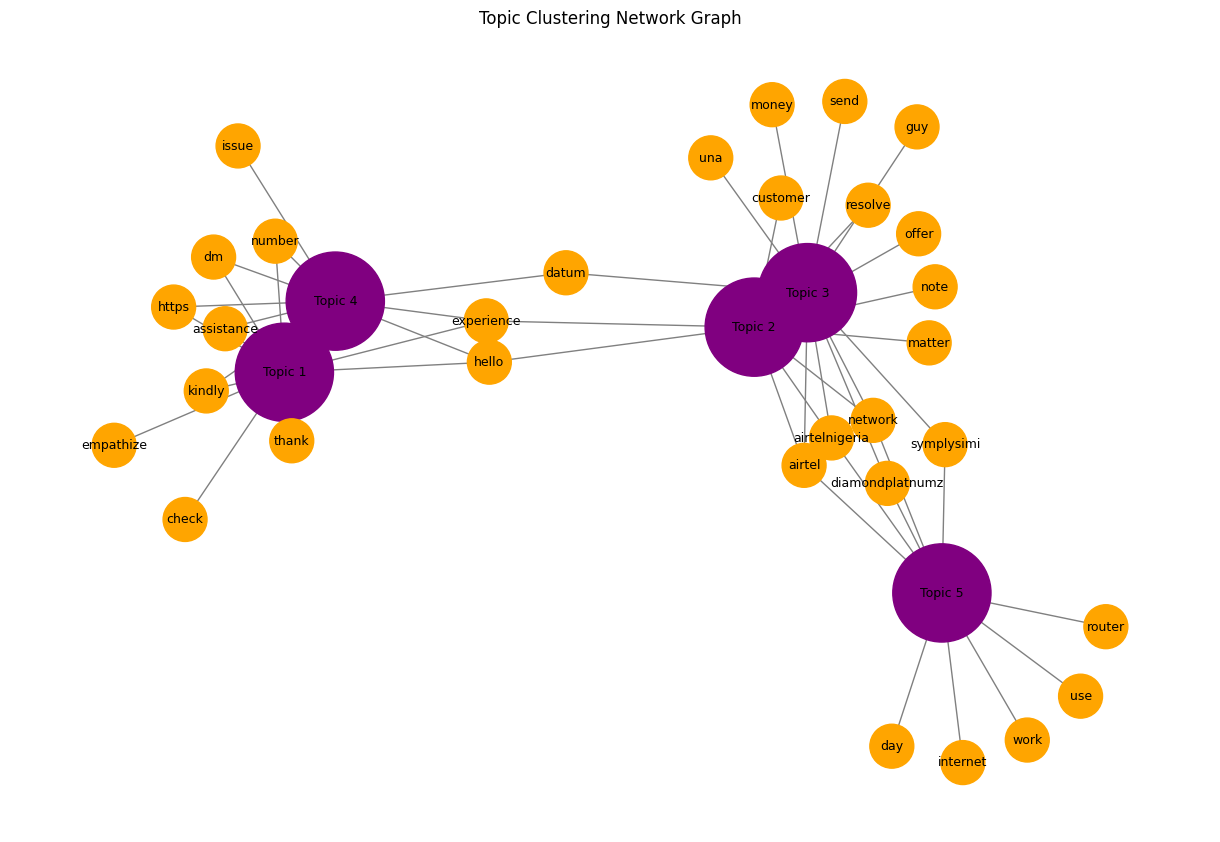

In [6]:
import pandas as pd
import re
import nltk
import spacy
import networkx as nx
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

nltk.download('stopwords')
nlp = spacy.load("en_core_web_sm")

# Load Data (Ensure 'comments' column exists)
#df = pd.read_csv("airtel_comments.csv")  

# Preprocessing Function
def preprocess_text(text):
    text = re.sub(r'\W+', ' ', text.lower())  # Remove special characters & lowercase
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if token.text not in stopwords.words('english') and token.is_alpha]
    return " ".join(tokens)

# Apply Preprocessing
df['cleaned_comments'] = df['text'].astype(str).apply(preprocess_text)

# Convert Text to Vectorized Form
vectorizer = CountVectorizer(max_df=0.9, min_df=2, stop_words='english')
doc_term_matrix = vectorizer.fit_transform(df['cleaned_comments'])

# Apply LDA for Topic Modeling
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_model.fit(doc_term_matrix)

# Extract Topics
def get_topics(model, vectorizer, n_words=10):
    words = vectorizer.get_feature_names_out()
    topics = {}
    for idx, topic in enumerate(model.components_):
        topic_words = [words[i] for i in topic.argsort()[-n_words:]]
        topics[f"Topic {idx+1}"] = topic_words
    return topics

topics = get_topics(lda_model, vectorizer)
print("Identified Topics:")
for topic, words in topics.items():
    print(f"{topic}: {', '.join(words)}")

# --- 🌟 Visualization: Topic Clustering Network Graph 🌟 ---

# Create graph
G = nx.Graph()

# Add nodes and edges
for topic, words in topics.items():
    G.add_node(topic, size=5000, color='purple')  # Topic as a large purple node
    for word in words:
        G.add_node(word, size=1000, color='orange')  # Words as orange nodes
        G.add_edge(topic, word)  # Connect topic to words

# Get node colors and sizes
node_colors = [G.nodes[n].get('color', 'gray') for n in G.nodes]
node_sizes = [G.nodes[n].get('size', 500) for n in G.nodes]

# Draw network graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)  # Layout for visualization
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=node_sizes, edge_color="gray", font_size=9)
plt.title("Topic Clustering Network Graph")
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LCT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LCT\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


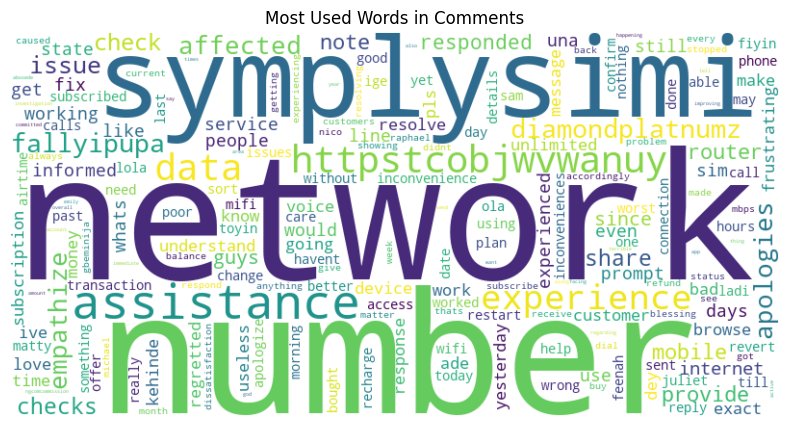

Top 20 Most Common Words in Comments:
network: 792
number: 719
symplysimi: 679
assistance: 626
httpstcobjwvwanuy: 566
data: 551
experience: 531
diamondplatnumz: 464
fallyipupa: 463
apologies: 421
empathize: 407
affected: 396
issue: 362
check: 337
share: 303
checks: 300
router: 274
provide: 273
note: 264
mobile: 262


In [1]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK stopwords and tokenizer data if not already done
nltk.download('stopwords')
nltk.download('punkt')

# Load your DataFrame (assuming it's named df and already loaded with the given columns)
# Uncomment and update this line to load your data
df = pd.read_csv('airtell_tweet_replies.csv')  # Replace 'your_file.csv' with the actual file path

# Combine all comment texts into a single string
all_comments = " ".join(df['text'].dropna())

# Text cleaning function
def preprocess_text(text):
    # Remove special characters, numbers, and punctuation
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)      # Remove numbers
    text = re.sub(r'\s+', ' ', text)    # Remove extra spaces
    text = text.lower()                  # Convert to lowercase
    return text.strip()

# Apply preprocessing
cleaned_text = preprocess_text(all_comments)

# Tokenize words
words = word_tokenize(cleaned_text)

# Define custom stopwords
custom_stopwords = set(stopwords.words('english'))
custom_stopwords.update(['mtn', 'airtel', 'nigeria','airtelnigeria', 'other', 
                         'can', 'cant', 'do', 'dont', 'please','mtnng','hello','thank','kindly','via'])  # Add specific words to exclude

# Remove stopwords
filtered_words = [word for word in words if word not in custom_stopwords and len(word) > 2]  # Exclude stopwords and short words

# Count word frequency
word_counts = Counter(filtered_words)

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(word_counts)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Used Words in Comments')
plt.show()

# Print the 20 most common words
most_common_words = word_counts.most_common(20)
print("Top 20 Most Common Words in Comments:")
for word, count in most_common_words:
    print(f"{word}: {count}")


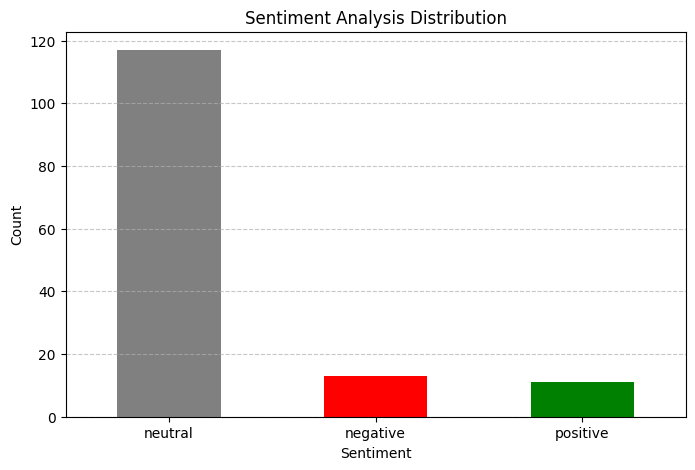

In [13]:
import matplotlib.pyplot as plt
df=pd.read_csv("filtered_comments_airtel_with_gpt_sentiment.csv")
# Count the occurrences of each sentiment
sentiment_counts = df["sentiment analysis"].value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 5))
sentiment_counts.plot(kind="bar", color=["gray","red", "green"])

# Labels and title
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Sentiment Analysis Distribution")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()


C:\Users\LCT\AppData\Local\Temp\ipykernel_6596\1781582651.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=["green", "gray", "red"])


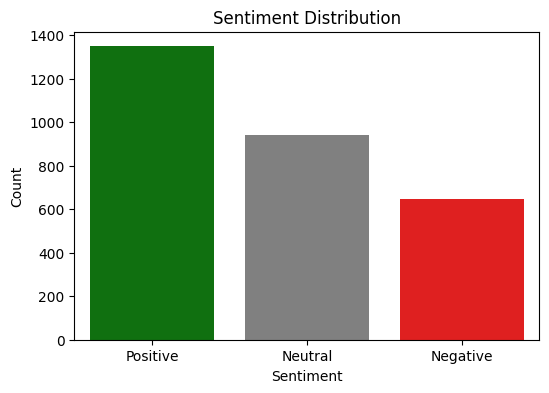

{'Topic 1': ['https',
  'informed',
  'empathize',
  'note',
  'responded',
  'check',
  'kindly',
  'dm',
  'hello',
  'thank'],
 'Topic 2': ['don',
  'una',
  'airtel',
  'guys',
  'data',
  'network',
  'fallyipupa01',
  'diamondplatnumz',
  'symplysimi',
  'airtelnigeria'],
 'Topic 3': ['https',
  'issue',
  'assistance',
  'dm',
  'number',
  'kindly',
  'thank',
  'hello',
  'apologies',
  'experience'],
 'Topic 4': ['kindly',
  'affected',
  'empathize',
  'bjwvw0anuy',
  'dm',
  'https',
  'number',
  'assistance',
  'thank',
  'hello'],
 'Topic 5': ['days',
  'internet',
  'working',
  '5g',
  'symplysimi',
  'sim',
  'router',
  'airtel',
  'network',
  'airtelnigeria']}

In [10]:
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import seaborn as sns

# Sentiment Analysis
def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

df["sentiment"] = df["text"].astype(str).apply(get_sentiment)

# Sentiment Distribution Plot
sentiment_counts = df["sentiment"].value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=["green", "gray", "red"])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

# Topic Modeling (LDA)
vectorizer = CountVectorizer(stop_words="english", max_features=1000)
X = vectorizer.fit_transform(df["text"].astype(str))

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

# Display Top Words for Each Topic
words = vectorizer.get_feature_names_out()
topics = {f"Topic {i+1}": [words[idx] for idx in lda.components_[i].argsort()[-10:]] for i in range(5)}

topics


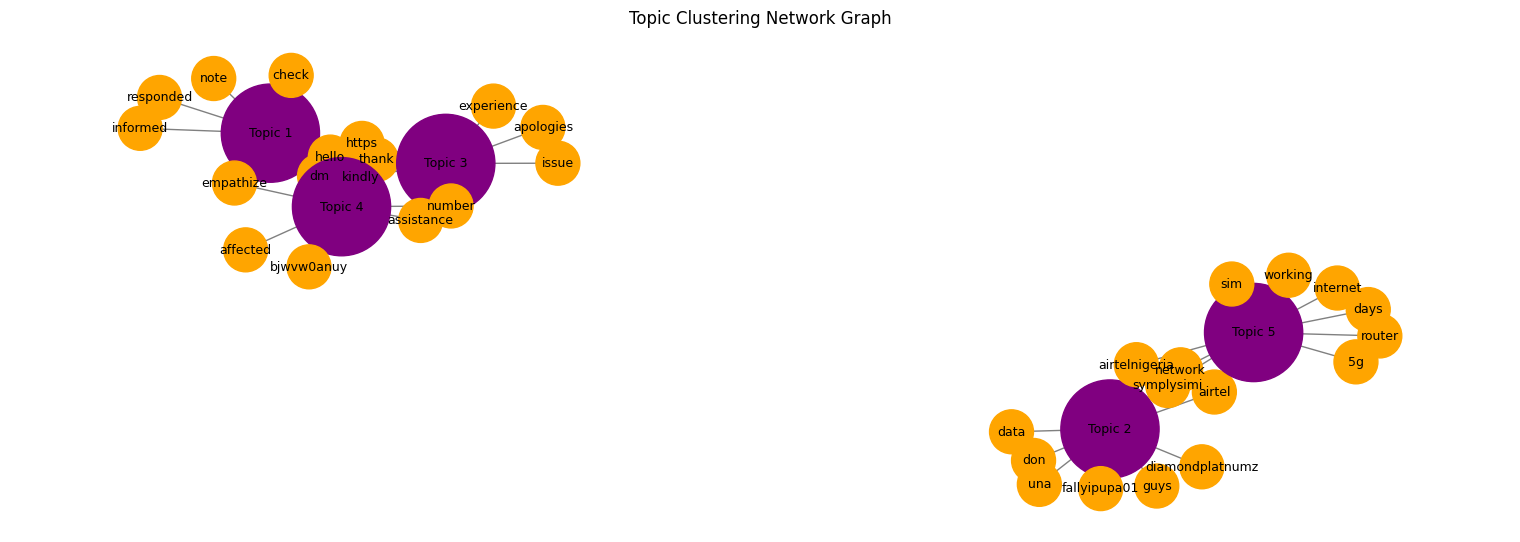

In [23]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Define topic clusters
topics = {
    'Topic 1': ['https', 'informed', 'empathize', 'note', 'responded', 'check', 'kindly', 'dm', 'hello', 'thank'],
    'Topic 2': ['don', 'una', 'airtel', 'guys', 'data', 'network', 'fallyipupa01', 'diamondplatnumz', 'symplysimi', 'airtelnigeria'],
    'Topic 3': ['https', 'issue', 'assistance', 'dm', 'number', 'kindly', 'thank', 'hello', 'apologies', 'experience'],
    'Topic 4': ['kindly', 'affected', 'empathize', 'bjwvw0anuy', 'dm', 'https', 'number', 'assistance', 'thank', 'hello'],
    'Topic 5': ['days', 'internet', 'working', '5g', 'symplysimi', 'sim', 'router', 'airtel', 'network', 'airtelnigeria']
}

# Create graph
G = nx.Graph()

# Add nodes and edges
for topic, words in topics.items():
    G.add_node(topic, size=5000, color='purple')  # Topic as a large red node
    for word in words:
        G.add_node(word, size=1000, color='orange')  # Words as blue nodes
        G.add_edge(topic, word)  # Connect topic to words

# Get node colors and sizes
node_colors = [G.nodes[n].get('color', 'gray') for n in G.nodes]
node_sizes = [G.nodes[n].get('size', 500) for n in G.nodes]

# Draw network graph
plt.figure(figsize=(15, 5))
pos = nx.spring_layout(G, seed=42)  # Layout for visualization
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=node_sizes, edge_color="gray", font_size=9)
plt.title("Topic Clustering Network Graph")
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LCT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


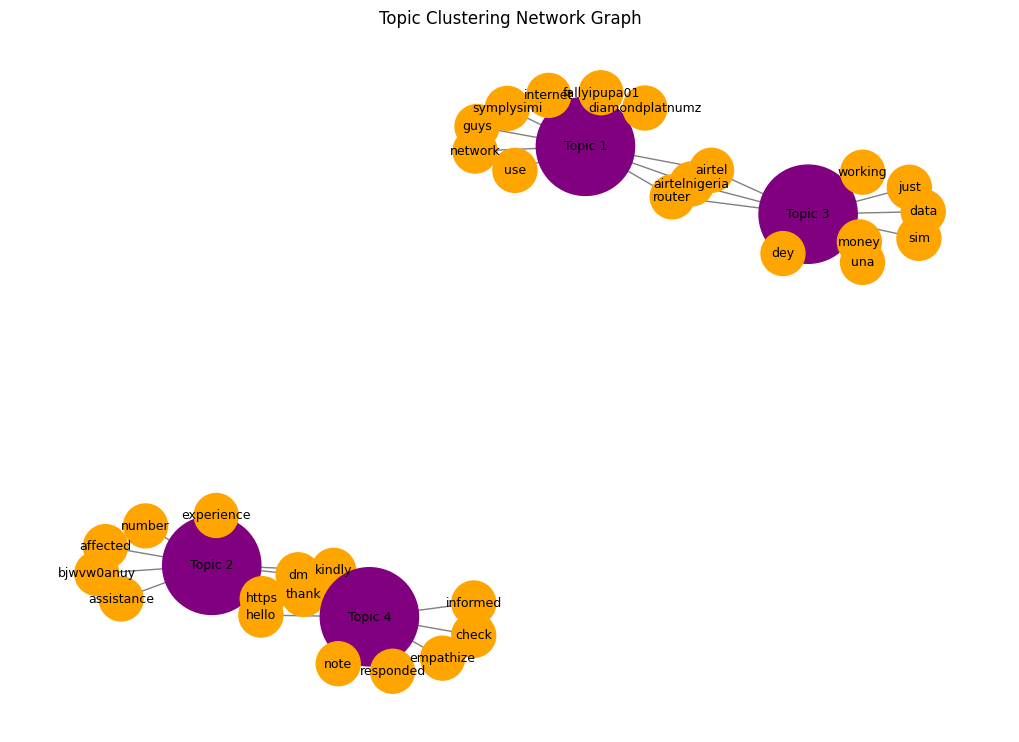

In [3]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import networkx as nx
import matplotlib.pyplot as plt

# Ensure stopwords are downloaded
nltk.download('stopwords')
from nltk.corpus import stopwords

# Preprocess text data
stop_words = set(stopwords.words('english'))
vectorizer = CountVectorizer(stop_words='english', max_features=500)
X = vectorizer.fit_transform(df['text'].dropna())

# Perform LDA for topic extraction
num_topics = 4  # Adjust number of topics if needed
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_model.fit(X)

# Get topic keywords
words = vectorizer.get_feature_names_out()
topics = {}
for topic_idx, topic in enumerate(lda_model.components_):
    top_words = [words[i] for i in topic.argsort()[:-11:-1]]
    topics[f'Topic {topic_idx+1}'] = top_words

# Create Network Graph
G = nx.Graph()


# Add nodes and edges
for topic, words in topics.items():
    G.add_node(topic, size=5000, color='purple')  # Topic as a large red node
    for word in words:
        G.add_node(word, size=1000, color='orange')  # Words as blue nodes
        G.add_edge(topic, word)  # Connect topic to words

# Get node colors and sizes
node_colors = [G.nodes[n].get('color', 'gray') for n in G.nodes]
node_sizes = [G.nodes[n].get('size', 500) for n in G.nodes]

# Draw network graph
plt.figure(figsize=(10, 7))
pos = nx.spring_layout(G, seed=42)  # Layout for visualization
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=node_sizes, edge_color="gray", font_size=9)
plt.title("Topic Clustering Network Graph")
plt.show()
